In [1]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="The leaning tower of Pisa" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[0.3,0.3,0.8]"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


In [3]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="The leaning tower of Pisa"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


In [6]:
from diffusers import StableDiffusionPipeline

# 指定你的模型存储路径
model_path = "/root/autodl-tmp/stable-diffusion-2-1-base"

# 从本地加载模型
pipe = StableDiffusionPipeline.from_pretrained(model_path)

# 如果你有可用的 GPU，推荐将模型放到 GPU 上以加速图像生成过程
pipe = pipe.to("cuda")

prompt = "The leaning tower of Pisa"

image = pipe(prompt).images[0]
    
image.save("The leaning tower of Pisa.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image

# 载入一个预训练的模型
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 准备图像
image_path = 'The leaning tower of Pisa.png'
image = Image.open(image_path)
transform = T.Compose([T.ToTensor()])
image = transform(image).unsqueeze(0)

# 检测图片中的对象
with torch.no_grad():
    prediction = model(image)

# 输出检测到的对象的边界框和长宽比
boxes = prediction[0]['boxes']
scores = prediction[0]['scores']
areas = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])  # 计算每个框的面积

# 找到最大对象
max_area_idx = torch.argmax(areas)  # 获取最大面积的索引
max_box = boxes[max_area_idx]  # 获取最大面积的边界框
score = scores[max_area_idx]  # 获取最大面积的得分

if score > 0:  # 根据需要设置置信度阈值
    x_min, y_min, x_max, y_max = max_box
    width = x_max - x_min
    height = y_max - y_min
    aspect_ratio = width / height
    print(f"Detected largest object with aspect ratio: {aspect_ratio:.2f}")
else:
    print("No object detected with high confidence.")


/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:15<00:00, 10.5MB/s] 


Detected largest object with aspect ratio: 0.80


Detected largest object with aspect ratio: 0.80


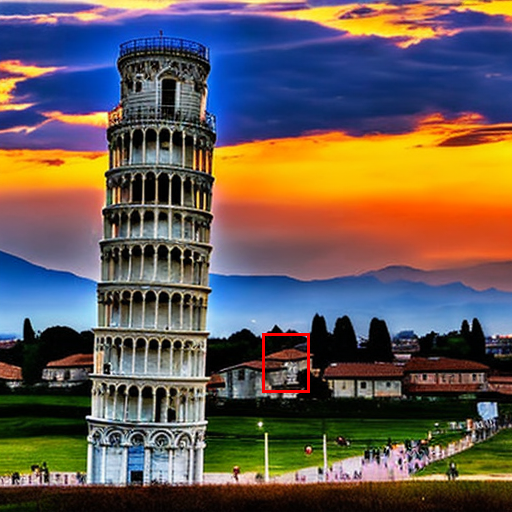

In [8]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw

# 加载预训练模型
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 准备图像
image_path = 'The leaning tower of Pisa.png'
image = Image.open(image_path)
transform = T.Compose([T.ToTensor()])
tensor_image = transform(image).unsqueeze(0)

# 检测图像中的对象
with torch.no_grad():
    prediction = model(tensor_image)

# 找到最大的对象
boxes = prediction[0]['boxes']
scores = prediction[0]['scores']
areas = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])  # 计算每个框的面积
max_area_idx = torch.argmax(areas)  # 获取最大面积的索引
max_box = boxes[max_area_idx]  # 获取最大面积的边界框
score = scores[max_area_idx]  # 获取得分

# 绘制边界框
draw = ImageDraw.Draw(image)
if score > 0:  # 置信度阈值
    x_min, y_min, x_max, y_max = max_box
    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=3)
    print(f"Detected largest object with aspect ratio: {(x_max - x_min) / (y_max - y_min):.2f}")
    image.show()  # 显示图像
    image.save("The leaning tower of Pisa with box.jpg")  # 保存图像
else:
    print("No object detected with high confidence.")


In [9]:
from diffusers import StableDiffusionPipeline

# 指定你的模型存储路径
model_path = "/root/autodl-tmp/stable-diffusion-2-1-base"

# 从本地加载模型
pipe = StableDiffusionPipeline.from_pretrained(model_path)

# 如果你有可用的 GPU，推荐将模型放到 GPU 上以加速图像生成过程
pipe = pipe.to("cuda")

prompt = "The leaning tower of Pisa with white background"

image = pipe(prompt).images[0]
    
image.save("The leaning tower of Pisa with white background.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

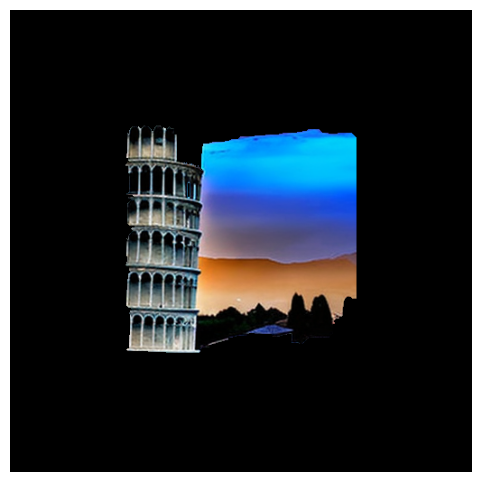

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
image = cv2.imread('The leaning tower of Pisa.png')

# 获取图像尺寸
height, width = image.shape[:2]

# 计算矩形区域（图像中心的1/2）
x_center = width // 2
y_center = height // 2
rect_width = width // 4  # 宽度的1/4，因为我们取的是中间的1/2，所以是1/4到3/4
rect_height = height // 4  # 同理，高度的1/4

# 矩形坐标：(起始x, 起始y, 宽度, 高度)
rect = (x_center - rect_width, y_center - rect_height, 2 * rect_width, 2 * rect_height)

# 初始化掩模和背景/前景模型
mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 使用GrabCut算法
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 将背景和可能的背景区域标为 0，其他标为 1
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
image = image * mask2[:, :, np.newaxis]

# 显示结果
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()


In [12]:
from diffusers import StableDiffusionPipeline

# 指定你的模型存储路径
model_path = "/root/autodl-tmp/stable-diffusion-2-1-base"

# 从本地加载模型
pipe = StableDiffusionPipeline.from_pretrained(model_path)

# 如果你有可用的 GPU，推荐将模型放到 GPU 上以加速图像生成过程
pipe = pipe.to("cuda")

prompt = "A fancy car"

image = pipe(prompt).images[0]
    
image.save("A fancy car.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/root/miniconda3/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


  0%|          | 0/50 [00:00<?, ?it/s]

In [13]:
from diffusers import StableDiffusionPipeline

# 指定你的模型存储路径
model_path = "/root/autodl-tmp/stable-diffusion-2-1-base"

# 从本地加载模型
pipe = StableDiffusionPipeline.from_pretrained(model_path)

# 如果你有可用的 GPU，推荐将模型放到 GPU 上以加速图像生成过程
pipe = pipe.to("cuda")

prompt = "A car"

image = pipe(prompt).images[0]
    
image.save("A car.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
!pip install --upgrade pip
!pip install backgroundremover

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 2.1 MB 3.2 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 787.0 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 3.5 MB/s eta 0:00:00

In [17]:
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [19]:
!rm /root/.u2net/u2net.pth


In [20]:
!backgroundremover -i "The leaning tower of Pisa.png" -o "The leaning tower of Pisa output.png"

The leaning tower of Pisa output.png
DEBUG: path to be checked: /root/.u2net/u2net.pth
downloading model [u2net] to /root/.u2net/u2net.pth ...
downloading part 1 of u2net
finished downloading part 1 of u2net
downloading part 2 of u2net
finished downloading part 2 of u2net
downloading part 3 of u2net
finished downloading part 3 of u2net
downloading part 4 of u2net
finished downloading part 4 of u2net


In [ ]:
from diffusers import StableDiffusionPipeline

# 指定你的模型存储路径
model_path = "/root/autodl-tmp/stable-diffusion-2-1-base"

# 从本地加载模型
pipe = StableDiffusionPipeline.from_pretrained(model_path)

# 如果你有可用的 GPU，推荐将模型放到 GPU 上以加速图像生成过程
pipe = pipe.to("cuda")

prompt = "A car"

image = pipe(prompt).images[0]
    
image.save("A car.png")

In [3]:
import cv2
# 读取图像
image = cv2.imread('The leaning tower of Pisa output.png')

# 获取图像尺寸
h, w = image.shape[:2]

print(h, w)

512 512


In [4]:
import cv2
# 读取图像
image = cv2.imread('The leaning tower of Pisa.png')

# 获取图像尺寸
h, w = image.shape[:2]

print(h, w)

512 512


In [5]:
from PIL import Image

# 加载图像
image_path = 'The leaning tower of Pisa output.png'
image = Image.open(image_path)

# 确保图像是RGBA格式，有alpha通道表示透明度
if image.mode != 'RGBA':
    image = image.convert('RGBA')

# 获取图像尺寸和像素数据
width, height = image.size
pixels = image.load()

# 初始化边界坐标
min_x = width
max_x = 0
min_y = height
max_y = 0

# 扫描每个像素，找到非透明像素的边界
for x in range(width):
    for y in range(height):
        r, g, b, a = pixels[x, y]
        if a > 0:  # alpha通道值大于0表示像素非透明
            min_x = min(min_x, x)
            max_x = max(max_x, x)
            min_y = min(min_y, y)
            max_y = max(max_y, y)

# 计算边界框的宽度和高度
bbox_width = max_x - min_x + 1
bbox_height = max_y - min_y + 1

# 计算长宽比
aspect_ratio = bbox_width / bbox_height

# 打印结果
print("边界框宽度:", bbox_width)
print("边界框高度:", bbox_height)
print("长宽比:", aspect_ratio)


边界框宽度: 221
边界框高度: 492
长宽比: 0.4491869918699187


In [18]:
from PIL import Image

image_path = 'The leaning tower of Pisa output.png'
def calculate_ratio(image_path):
    # 加载rgba图像
    #image_path = 'The leaning tower of Pisa output.png'  # 确保路径正确
    image = Image.open(image_path)

    # 确保图像是RGBA格式
    if image.mode != 'RGBA':
        image = image.convert('RGBA')

    # 获取图像尺寸和像素数据
    width, height = image.size
    pixels = image.load()

    # 初始化边界坐标
    min_x = width
    max_x = 0
    min_y = height
    max_y = 0

    # 扫描每个像素，找到非透明像素的边界
    for x in range(width):
        for y in range(height):
            r, g, b, a = pixels[x, y]
            if a > 128:  # alpha通道值大于0表示像素非透明
                min_x = min(min_x, x)
                max_x = max(max_x, x)
                min_y = min(min_y, y)
                max_y = max(max_y, y)

    # 计算边界框的宽度和高度
    bbox_width = max_x - min_x + 1
    bbox_height = max_y - min_y + 1

    # 计算长宽比
    aspect_ratio = bbox_width / bbox_height

    # 打印结果
    print("边界框的位置: (xmin, ymin, xmax, ymax) =", (min_x, min_y, max_x, max_y))
    print("边界框宽度:", bbox_width)
    print("边界框高度:", bbox_height)
    print("长宽比:", aspect_ratio)
    
    return aspect_ratio
calculate_ratio(image_path)

边界框的位置: (xmin, ymin, xmax, ymax) = (86, 38, 215, 486)
边界框宽度: 130
边界框高度: 449
长宽比: 0.289532293986637


0.289532293986637

In [35]:
from diffusers import StableDiffusionPipeline



def imageGenerate(prompt):
    # 指定你的模型存储路径
    model_path = "/root/autodl-tmp/stable-diffusion-2-1-base"

    # 从本地加载模型
    pipe = StableDiffusionPipeline.from_pretrained(model_path)

    prompt1 = ", front view"
    prompt2 = ", side view"
    prompt_f = prompt + prompt1
    prompt_s = prompt + prompt2
    print(prompt_f)
    print(prompt_s)
    # 如果你有可用的 GPU，推荐将模型放到 GPU 上以加速图像生成过程
    pipe = pipe.to("cuda")

    image = pipe(prompt_f).images[0]

    image.save(prompt_f + ".png")
    
    image = pipe(prompt_s).images[0]
    
    image.save(prompt_s + ".png")
    
    print("done")


In [23]:
!backgroundremover -i "front view of A sports car.png" -o "front view of A sports car_remove.png"

front view of A sports car_remove.png
DEBUG: path to be checked: /root/.u2net/u2net.pth


In [24]:
!backgroundremover -i "side view of A sports car.png" -o "side view of A sports car_remove.png"

side view of A sports car_remove.png
DEBUG: path to be checked: /root/.u2net/u2net.pth


In [28]:
path = "front view of A sports car_remove.png"
a = calculate_ratio(path)

边界框的位置: (xmin, ymin, xmax, ymax) = (228, 142, 511, 374)
边界框宽度: 284
边界框高度: 233
长宽比: 1.2188841201716738


In [29]:
path = "side view of A sports car_remove.png"
b = calculate_ratio(path)

边界框的位置: (xmin, ymin, xmax, ymax) = (0, 168, 511, 383)
边界框宽度: 512
边界框高度: 216
长宽比: 2.3703703703703702


In [ ]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A sports car" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[1.22, 2.37, 1]"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


In [32]:
import numpy as np
# 创建一个三维向量
vector = np.array([1.22, 2.37, 1])

# 计算向量的模
norm = np.linalg.norm(vector)

# 进行归一化
normalized_vector = vector / norm

print(normalized_vector)


[0.42852413 0.83246081 0.35124929]


In [ ]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A sports car" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[0.43, 0.83, 0.35]"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


In [34]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A sports car"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


In [36]:
prompt = "a baseball bat"

In [37]:
prompt = "a baseball bat"
imageGenerate(prompt)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

a baseball bat, front view
a baseball bat, side view


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

done


In [38]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A baseball bat"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


In [39]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A mobile phone"

/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params


### baseball bat

In [40]:
vector = np.array([10, 1, 1])

# 计算向量的模
norm = np.linalg.norm(vector)

# 进行归一化
normalized_vector = vector / norm

print(normalized_vector)

[0.99014754 0.09901475 0.09901475]


### mobile phone

In [41]:
vector = np.array([5, 1, 10])

# 计算向量的模
norm = np.linalg.norm(vector)

# 进行归一化
normalized_vector = vector / norm

print(normalized_vector)

[0.4454354  0.08908708 0.89087081]


### controller

In [42]:
vector = np.array([5, 1, 3])

# 计算向量的模
norm = np.linalg.norm(vector)

# 进行归一化
normalized_vector = vector / norm

print(normalized_vector)

[0.84515425 0.16903085 0.50709255]


### keyboard

In [43]:
vector = np.array([12, 1, 4])

# 计算向量的模
norm = np.linalg.norm(vector)

# 进行归一化
normalized_vector = vector / norm

print(normalized_vector)

[0.94573249 0.07881104 0.31524416]


In [ ]:
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A baseball bat" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[0.9,0.1,0.1]"
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A mobile phone" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[0.44,0.1,0.9]"
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A gaming controller"
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A keyboard"
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A gaming controller" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[0.84,0.17,0.5]"
!python launch.py --config configs/fantasia3d.yaml --train --gpu 0 system.prompt_processor.prompt="A keyboard" system.geometry.shape_init=ellipsoid system.geometry.shape_init_params="[0.94,0.08,0.3]"



/root/miniconda3/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Seed set to 0
[INFO] Using 16bit Automatic Mixed Precision (AMP)
[INFO] GPU available: True (cuda), used: True
[INFO] TPU available: False, using: 0 TPU cores
[INFO] IPU available: False, using: 0 IPUs
[INFO] HPU available: False, using: 0 HPUs
[INFO] You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[INFO] LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[INFO] 
  | Name       | Type                 | Params
